# Ensemble Techniques
                                                                                        Aryan Jain

<b>Data Description and Context:</b>
    Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

<b>Domain:</b>
    Medicine


<b>Learning Outcomes:</b>

   -  Exploratory Data Analysis
   -  Supervised Learning
   -  Ensemble Learning
    
<b>Objective:</b>
    Goal is to classify the patients into the respective labels using the attributes from their voice recordings

### Import Python Libraries

In [1]:
# Importing packages for Data Management and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Classifiers & Modeling
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

In [2]:
# Function to print performance report

def get_model_performance(model, X_train, y_train, X_test, y_test, y_pred):
    print("\n********** PERFORMANCE METRICS**********\n")
    print("---------------------------------------------------\n")
    train_acc = round(model.score(X_train , y_train), 3)
    test_acc = round(model.score(X_test , y_test), 3)
    print('\nAccuracy for training set: {0:.3f}'.format(train_acc))
    print('Accuracy for testing set: {0:.3f}'.format(test_acc))
    print('\n\n')

    print(metrics.classification_report(y_test , y_pred))

    metrics.plot_confusion_matrix(model, X_test , y_test, values_format='d');
    
    
    
    precision = round(metrics.precision_score(y_test, y_pred), 3)
    recall = round(metrics.recall_score(y_test , y_pred), 3)
    f1 = round(metrics.f1_score(y_test , y_pred), 3)
    
    return train_acc, test_acc, precision, recall, f1

In [3]:
def update_performance_summary(summary_df, model_name, train_acc, test_acc, recall, f1, precision):
    
    new_summary = summary_df.copy()

    new_summary.loc[len(new_summary.index)] = [model_name, train_acc, test_acc, recall, f1, precision]
    return new_summary

In [4]:
def run_model(summary_df, model, model_name, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 
    
    # print performace report using custom defined function
    train_acc, test_acc, precision, recall, f1 = get_model_performance(model, X_train, y_train, X_test, y_test, y_pred)


    summary_df = update_performance_summary(summary_df, model_name, train_acc, test_acc, recall, f1, 
                                                 precision)
    
    return summary_df

In [5]:
# Initializing a dataframe to store the model performance summary
summary_df = pd.DataFrame(columns=["Model Name", "In-sample Accuracy", "Out-of-sample Accuracy", "Recall", 
                                   "F1 Score", "Precision"])

## ---------------------------- Exploratory Data Analysis (EDA) -----------------------

### Loading the dataset

In [6]:
# Reading the data as dataframe and print the first 10 rows
df = pd.read_csv('Data - Parkinsons')
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

<b>Note: </b> This only shows 20 out of the 24 columns, let's fix that so it shows all of them

In [7]:
# display all columns
pd.options.display.max_columns = None
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   
5           0.00008   0.00463   0.00750     0.01388       0.04701   
6           0.00003   0.00155   0.00202     0.00466       0.01608   
7           0.00003   0.00144   0.00182     0.00431       0.01567   
8           0.00006   0.00293   0.00332     0.00880       0.02093   
9           0.00006   0.00268   0.00332     0.00803       0.02838   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   
5             0.456       0.02328       0.03526   0.03243      0.06985   
6             0.140       0.00779       0.00937   0.01351      0.02337   
7             0.134       0.00829       0.00946   0.01256      0.02487   
8             0.191       0.01073       0.01277   0.01717      0.03218   
9             0.255       0.01441       0.01725   0.02444      0.04324   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   
5  0.01222  21.378       1  0.415564  0.825069 -4.242867  0.299111  2.187560   
6  0.00607  24.886       1  0.596040  0.764112 -5.634322  0.257682  1.854785   
7  0.00344  26.892       1  0.637420  0.763262 -6.167603  0.183721  2.064693   
8  0.01070  21.812       1  0.615551  0.773587 -5.498678  0.327769  2.322511   
9  0.01022  21.862       1  0.547037  0.798463 -5.011879  0.325996  2.432792   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335  
5  0.357775  
6  0.211756  
7  0.163755  
8  0.231571  
9  0.271362

In [8]:
# Move target column to last position, for convenience
df_temp = df['status']
df.drop(['status'], axis=1, inplace = True)
df['status'] = df_temp
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  status  
0  0.284654       1  
1  0.368674       1  
2  0.332634       1  
3  0.368975       1  
4  0.410335       1

### Eye-ball raw data / Understand the dataset 

In [9]:
# Get info of the dataframe columns
df.info()
rows_count, columns_count = df.shape

print('')
print('-----------------------------------------')
print('Total number of rows   : ', rows_count)
print('Total number of columns: ', columns_count)
print('-----------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<b>Note:</b> <br>
- Shape of the dataframe is (195, 24)
- There are 195 rows and 24 columns in the dataset
- All features are numerical, except "name" which appears to be a row unique classifier
- We will further investgate "name" 
- We will further investgate target "status" 
- <b>We may want to normalize numeric features</b> 

#### Checking missing values

In [10]:
# Check if any value is NaN.
df.isnull().values.any()

False

<b>Note: </b> <br>
No missing value in dataset.

#### Count unique values

In [11]:
# Count Unique values
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

<b>Note</b><br>
The column "name" appears a unique identifier for data rows. No relation with target variable. We will drop "name"

In [12]:
# Count of target variable
print(df['status'].value_counts(), end='\n\n')
print('Percentage of each value: ')
print((df['status'].value_counts(normalize=True)*100).round(2))

1    147
0     48
Name: status, dtype: int64

Percentage of each value: 
1    75.38
0    24.62
Name: status, dtype: float64


<b>Note</b><br> 
- Out of 195 records in the dataset, 147 have Parkinson's Disease
- 75% of records in the dataset have Parkinson's Disease

## ----------------------------------- Data Visualization --------------------------------

<b> 1. </b> Data distribution of each attribute:  <b>Univariate analysis</b><br>
<b> 2. </b> Based in pair plot & Corr heatmap, understand the Influence of important features <b>Multivariate analysis  </b> 

### Univariate analysis
<b> All features are numeric, I will use distplot for each variable against target (status) values </b>

<AxesSubplot:>

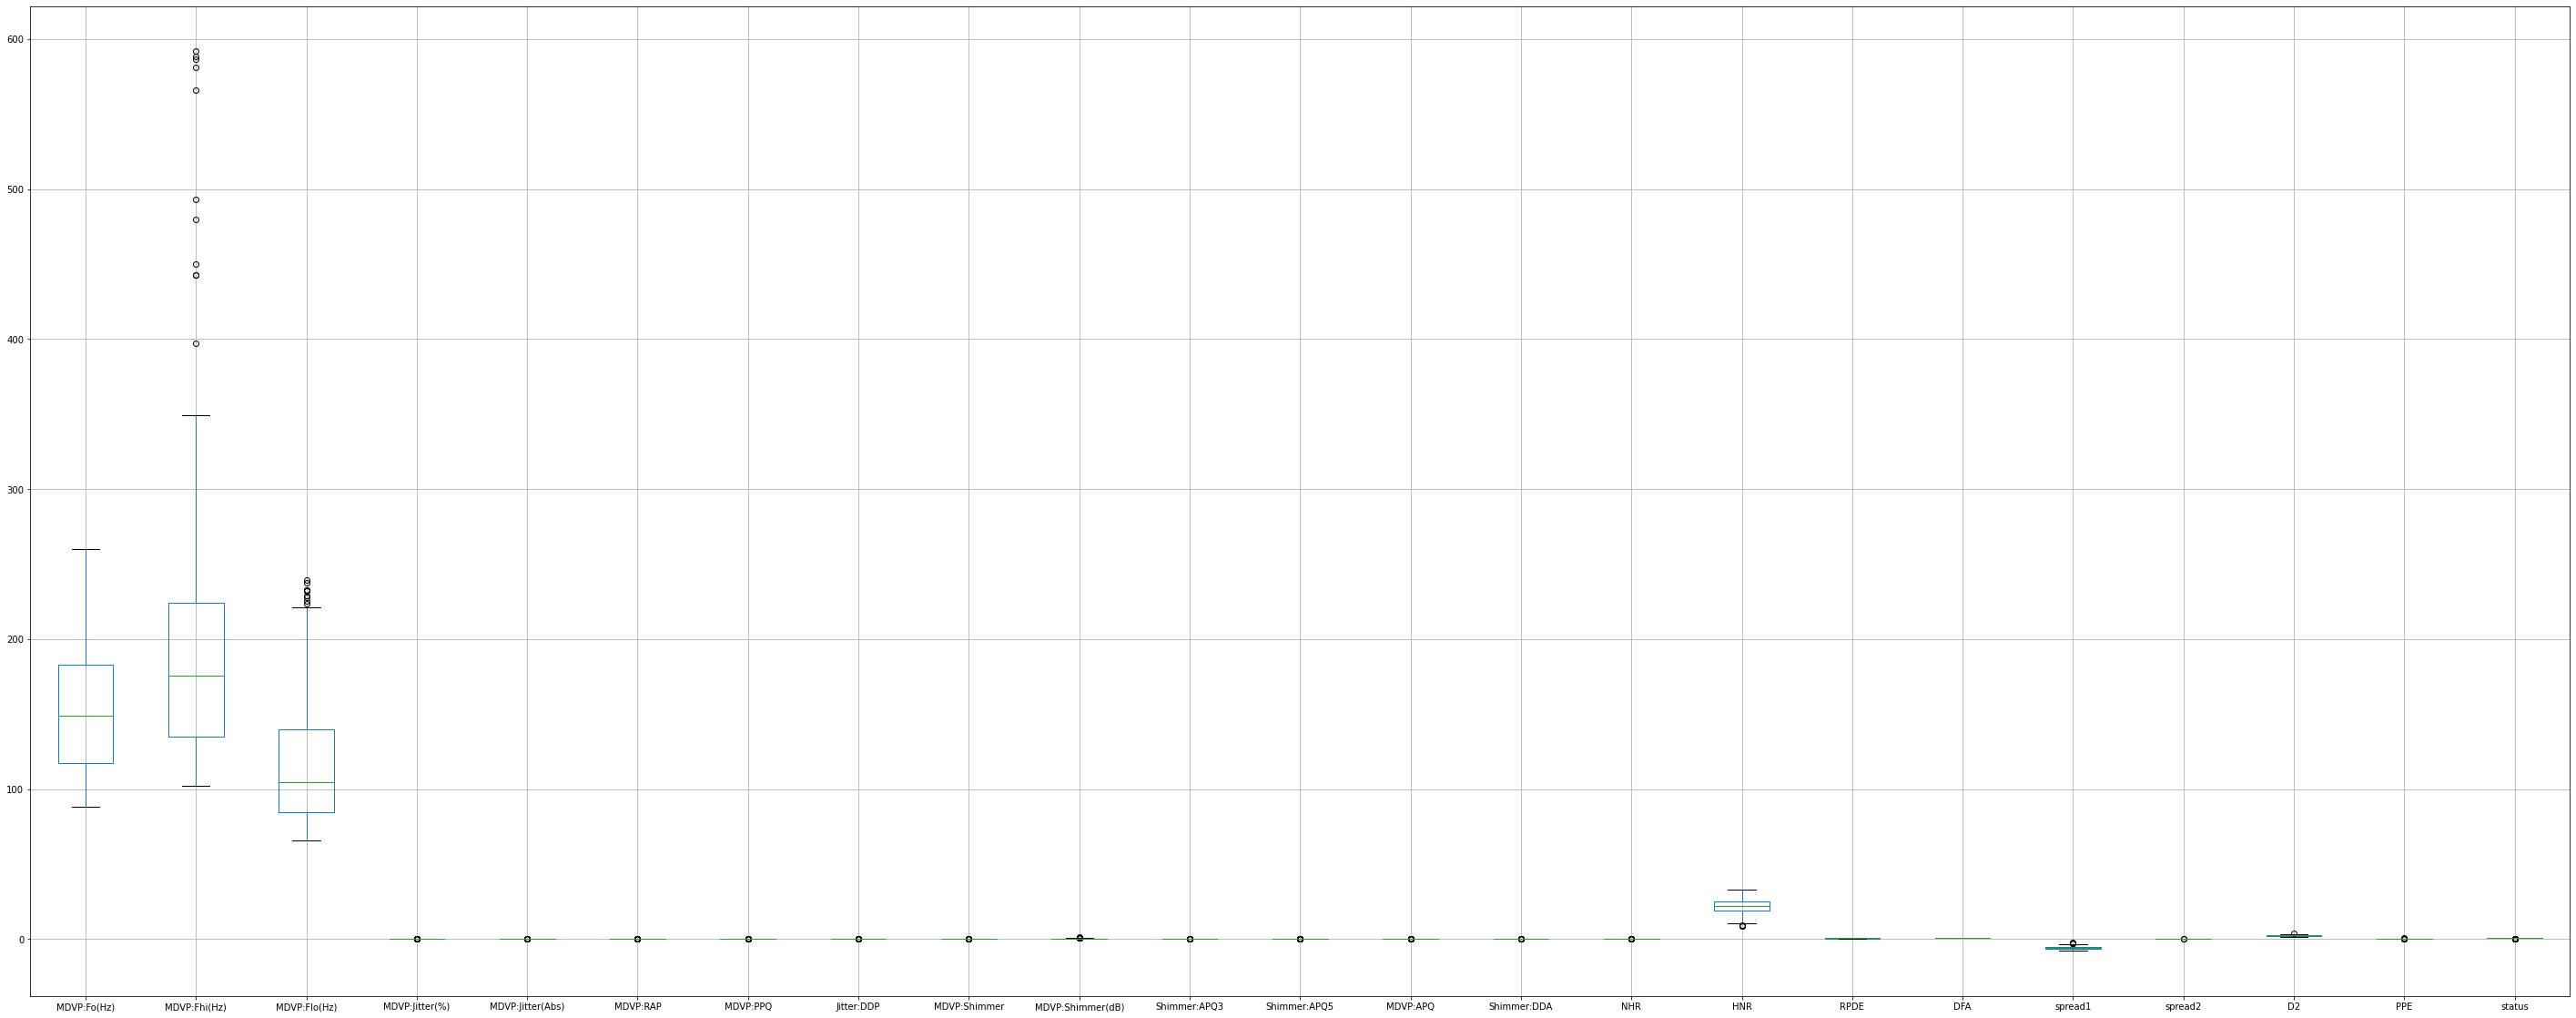

In [13]:
# Outlier detection
df.boxplot(return_type='axes', figsize=(50,20))

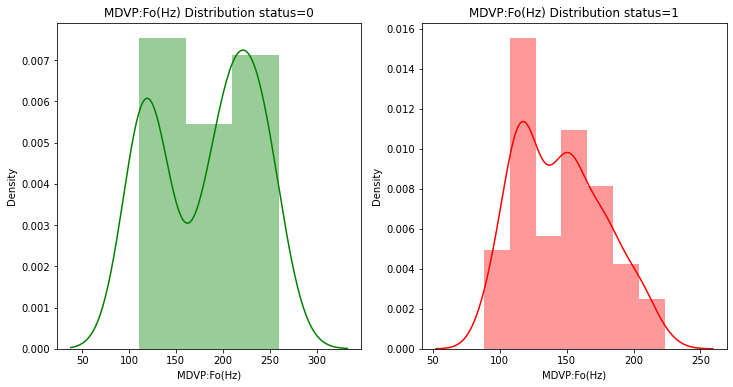

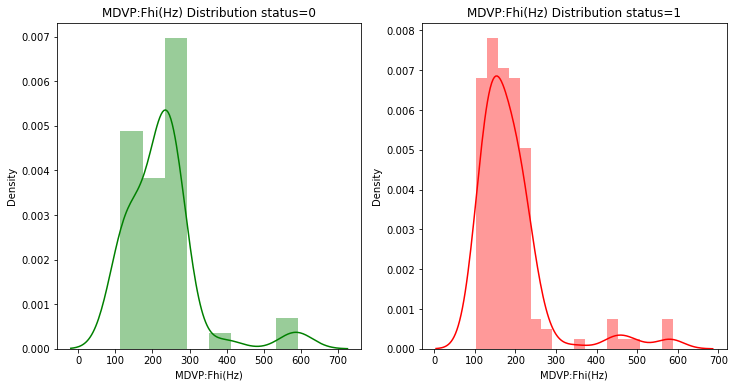

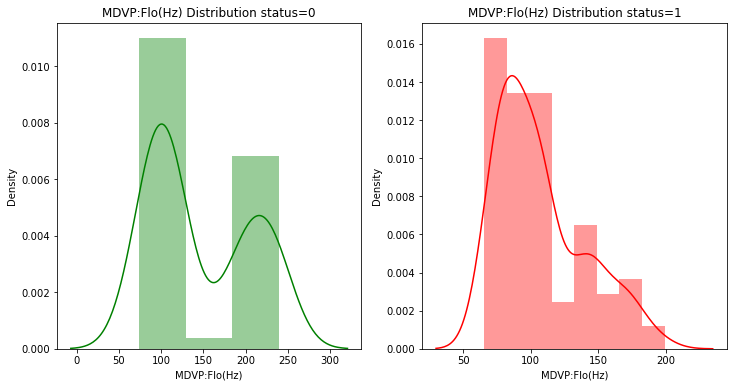

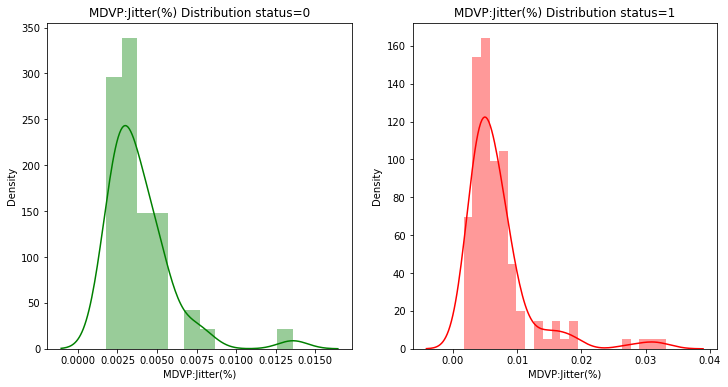

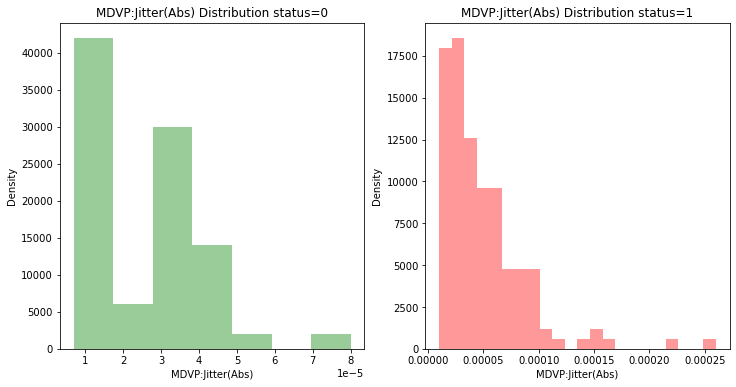

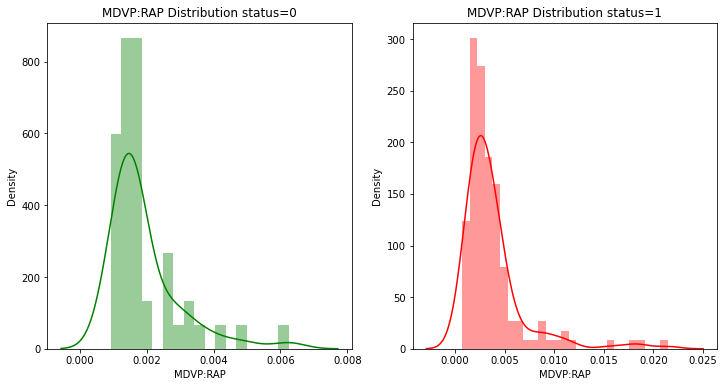

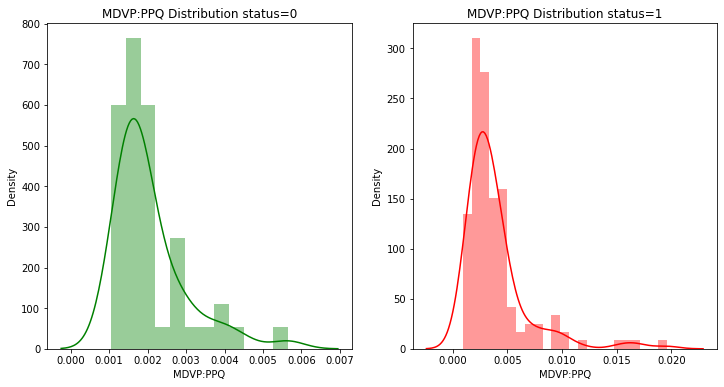

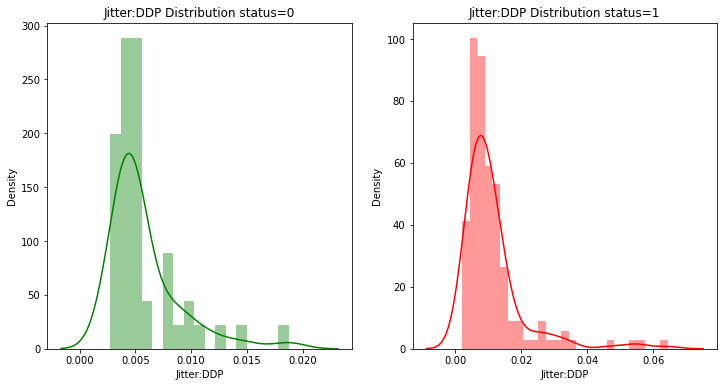

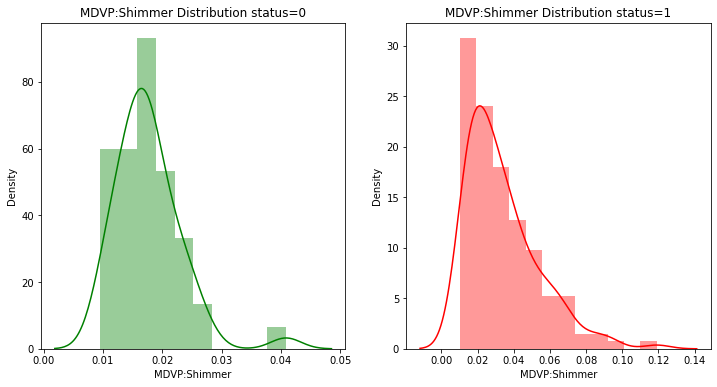

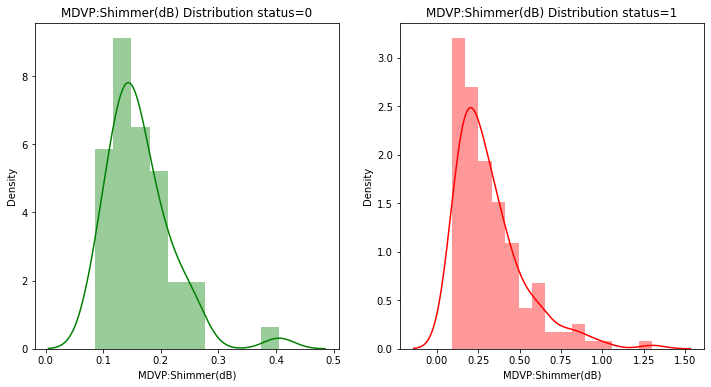

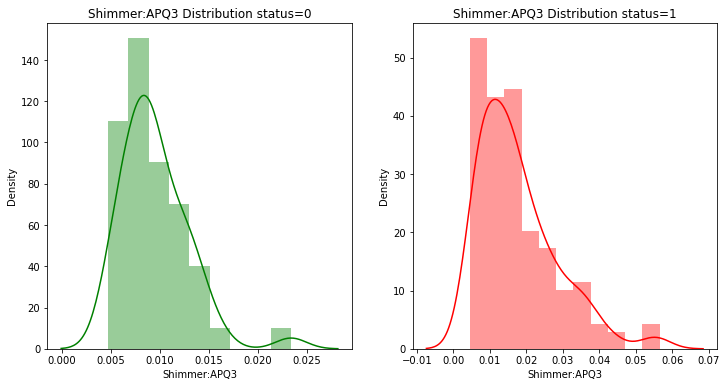

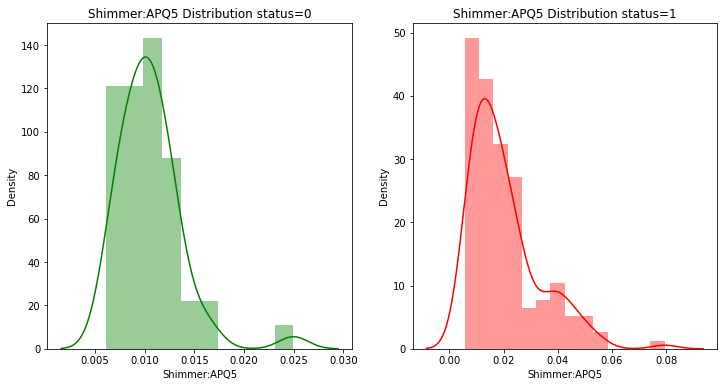

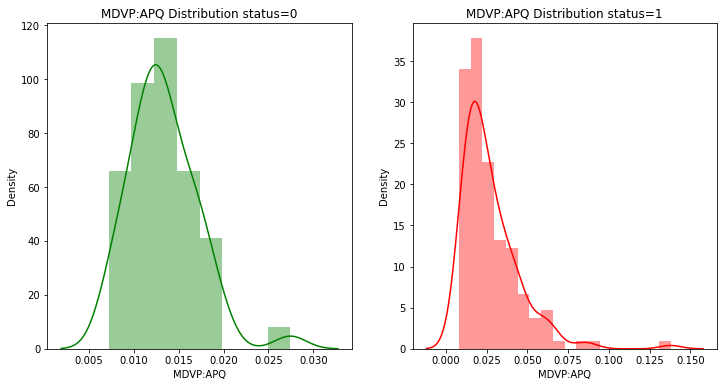

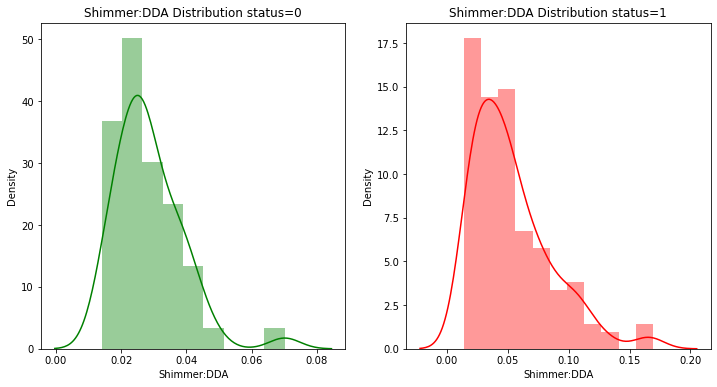

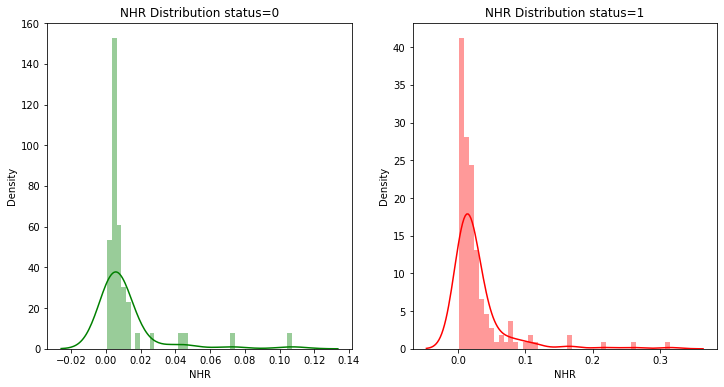

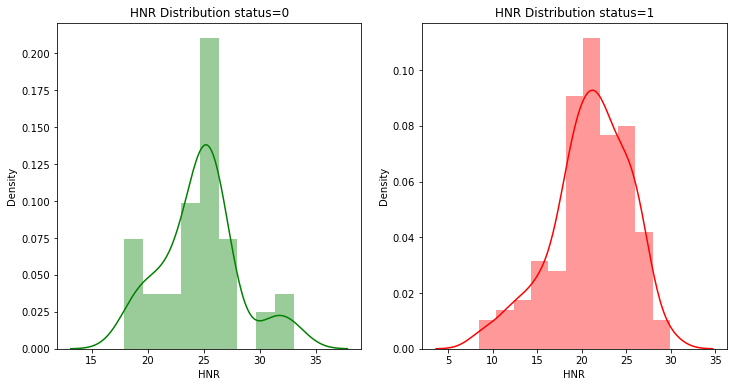

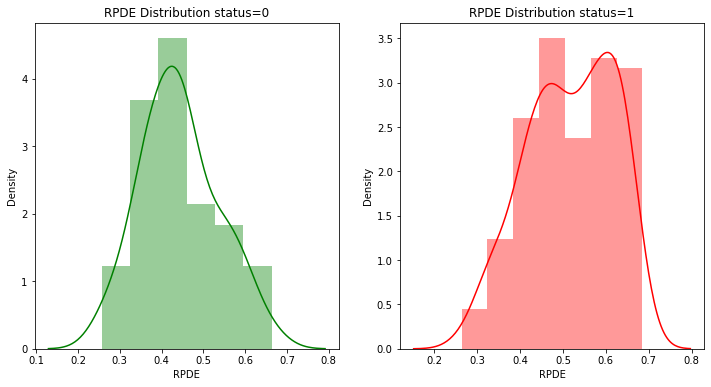

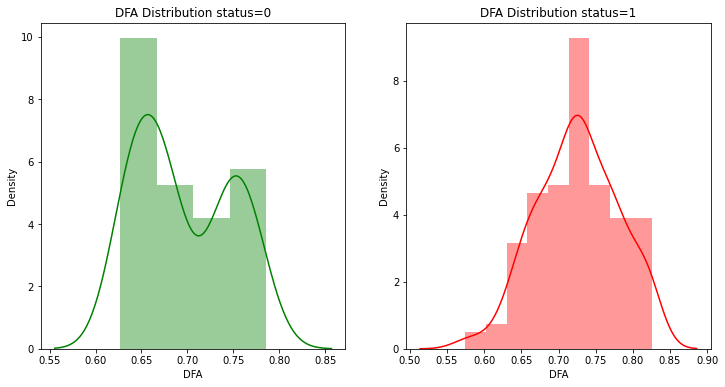

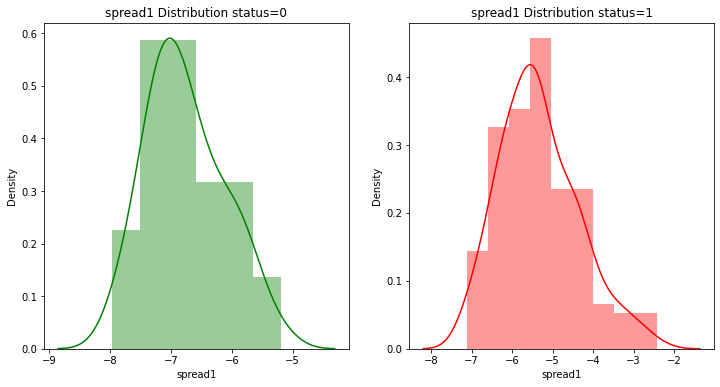

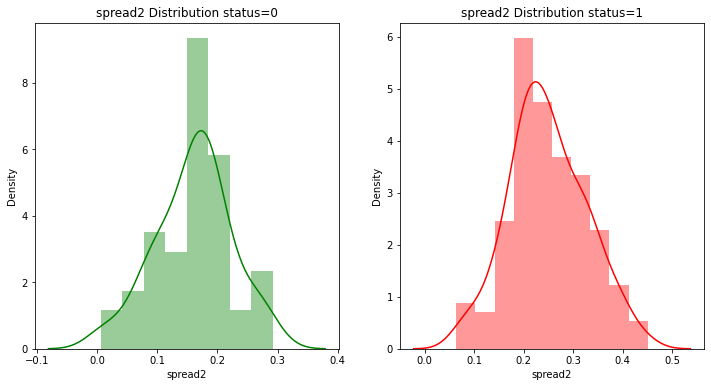

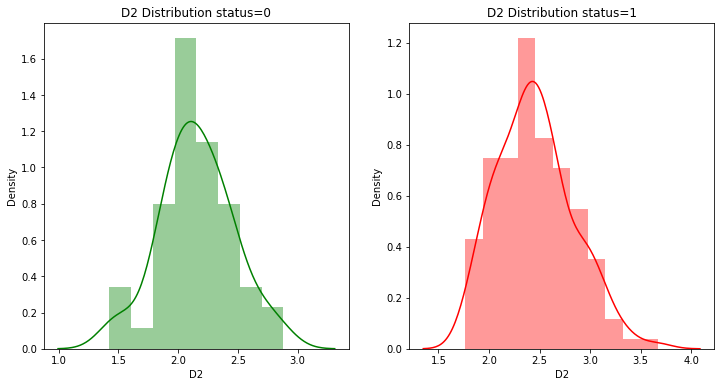

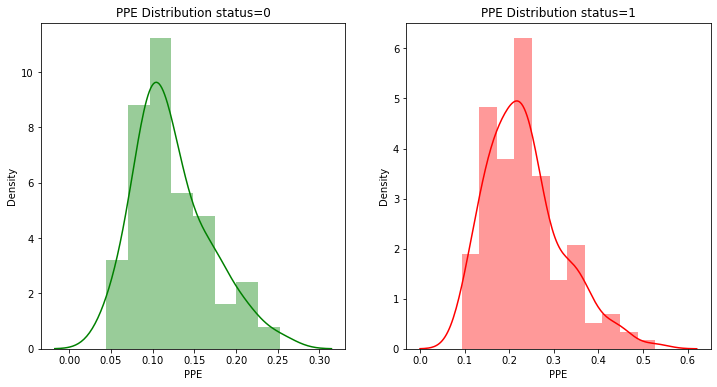

In [14]:
# Univariate plot for each feature
relation_df = df.copy()
for col in relation_df.columns[1:-1]:
    fig=plt.figure(figsize=(12, 6))
    
    ax = fig.add_subplot(121)
    sns.distplot(relation_df[(relation_df['status'] == 0)]
                 [col], color='g', ax=ax).set_title(f"{col} Distribution status=0");
    
    ax = fig.add_subplot(122)
    sns.distplot(relation_df[(relation_df['status'] == 1)]
                 [col], color='r', ax=ax).set_title(f"{col} Distribution status=1");
    plt.show()

### Basic Stastics / Understand data & spread

In [15]:
# Basic stats & Five point summary of numerical attributes
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   
status            195.0    0.753846   0.431878    0.000000    1.000000   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367  
status              1.000000    1.000000    1.000000

<b>Note</b> 
- <b>1. status </b> has two values 0 and 1 
- <b>2. Others </b> Please refer to notes written in earlier section of this notebook
- <b>3. Normalizing </b> The ML models will benefit from normalizing the features
- <b>4. Outliers </b> based on plots above, clearly few attributors have otliers. Decision Tree should do well.

### Bivariate analysis

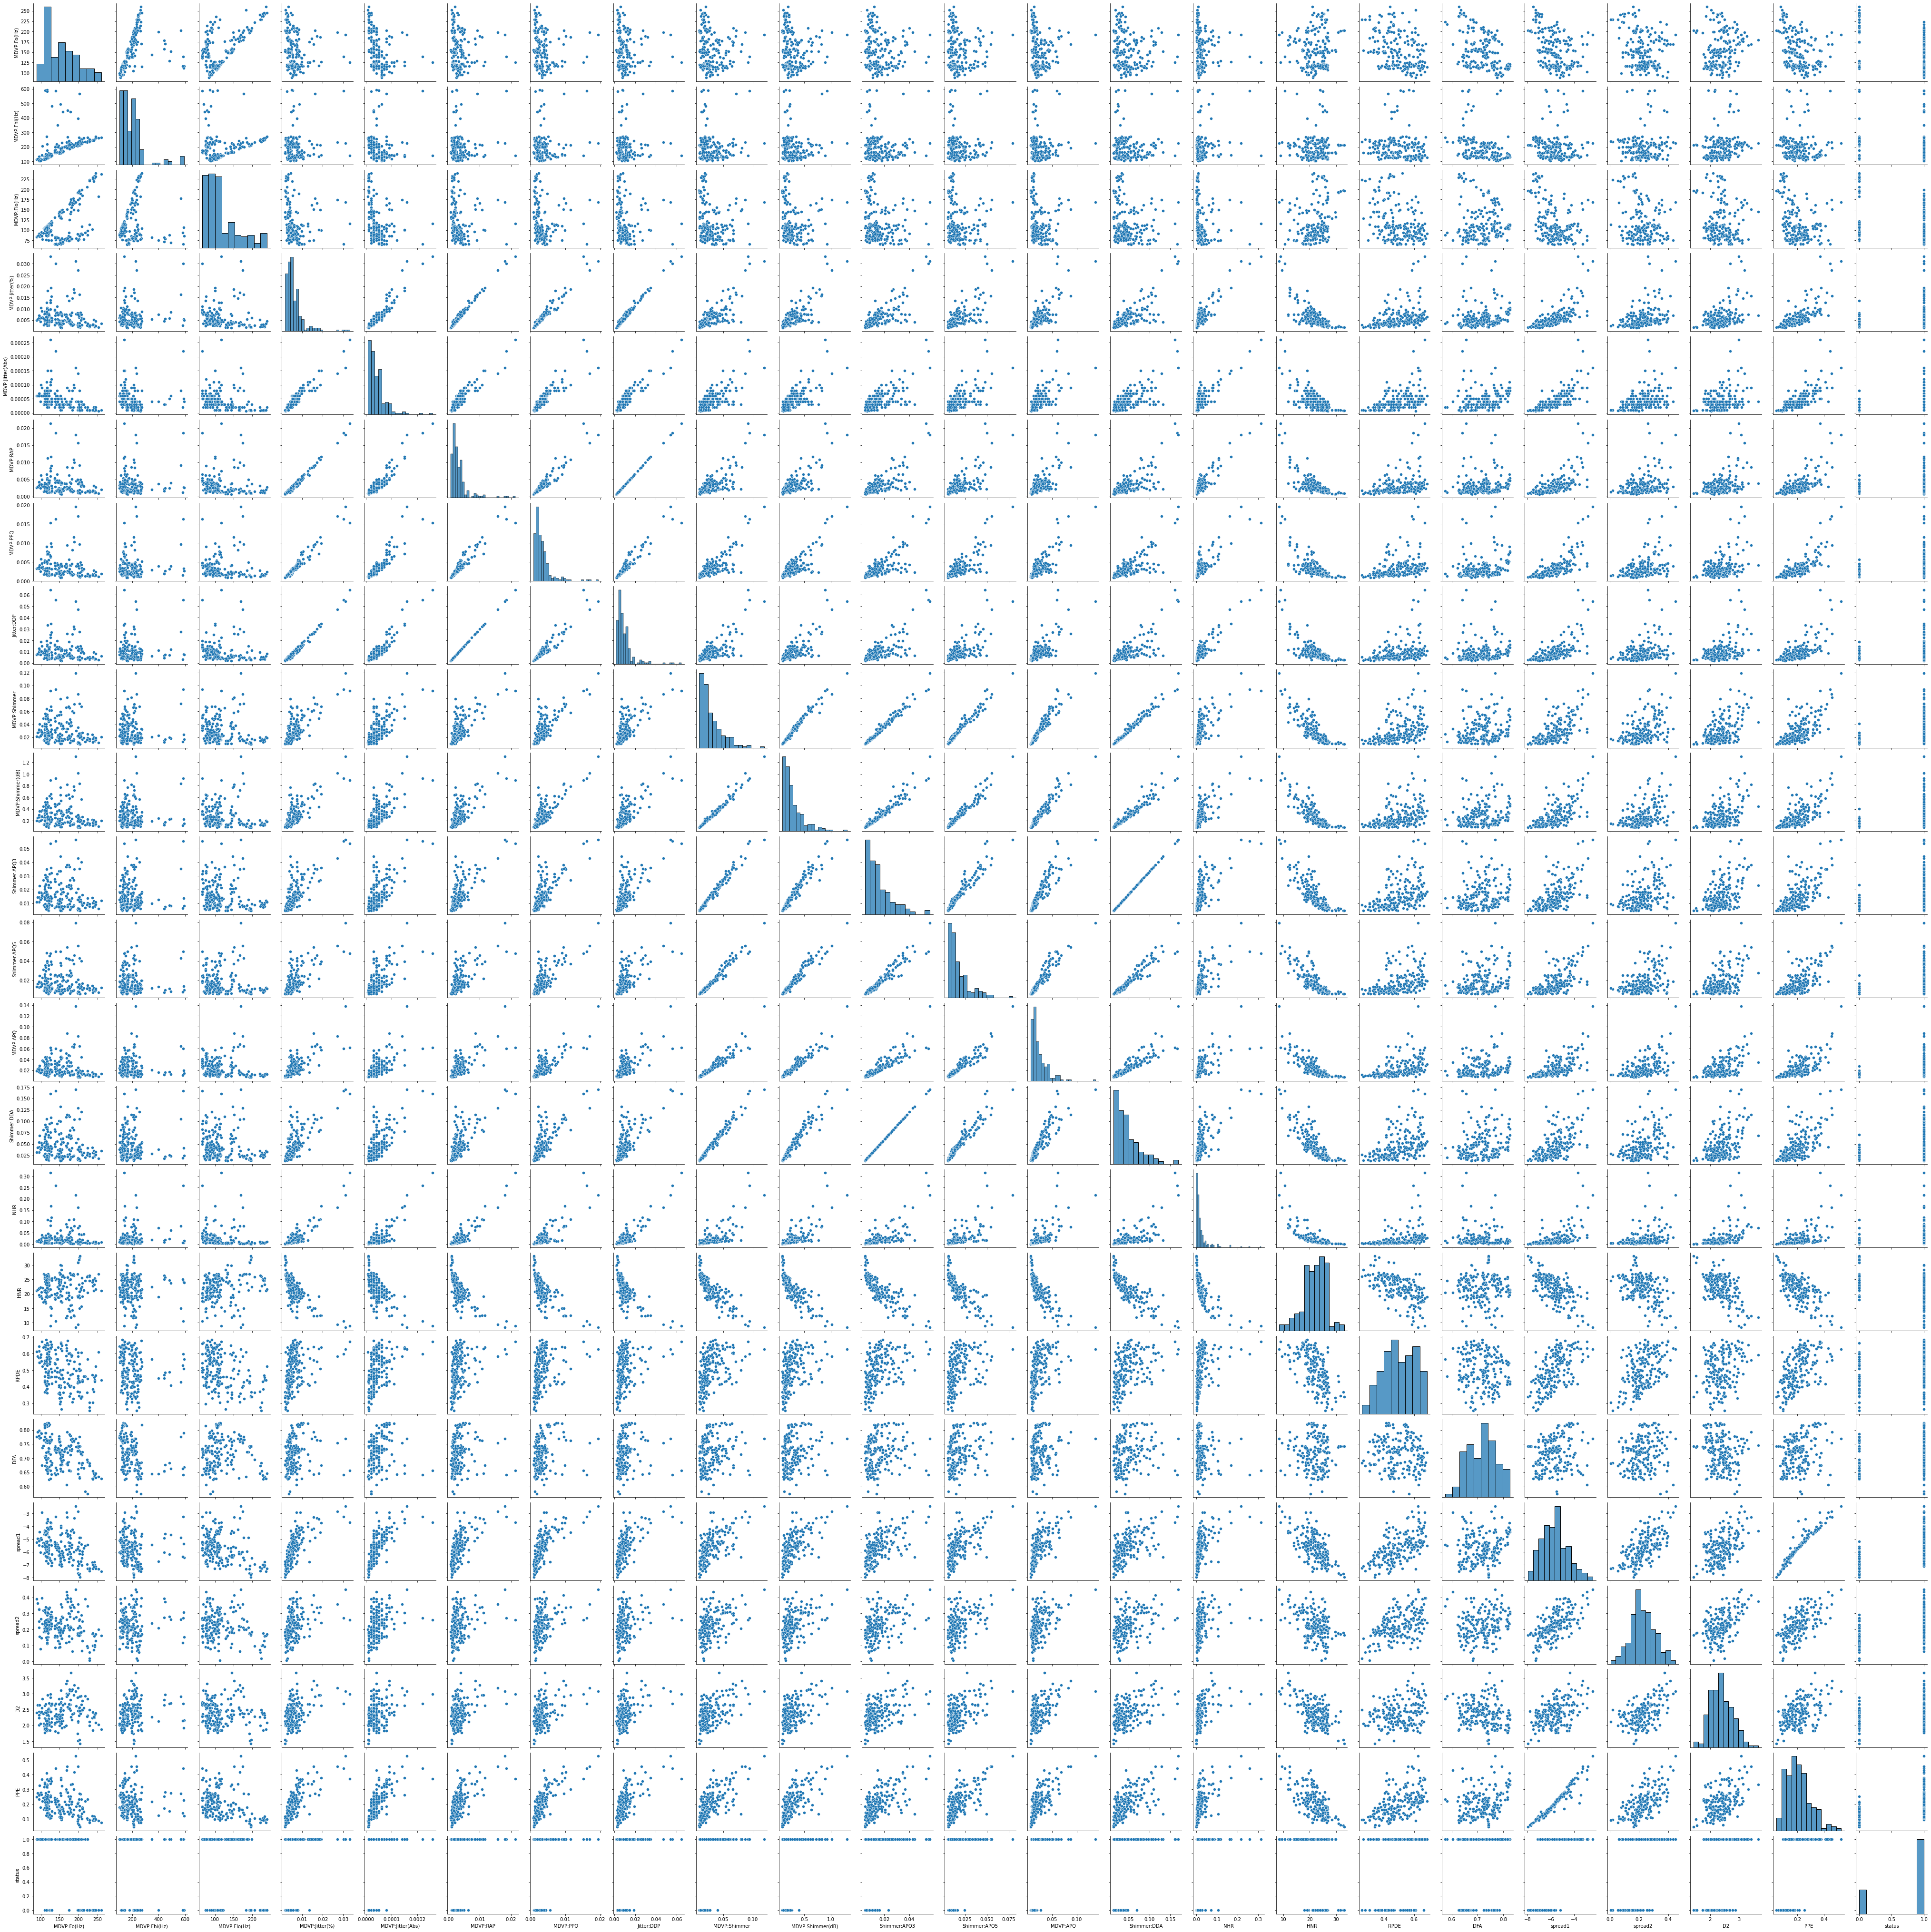

In [16]:
# Pairplot for all columns, excluding "name" column
sns.pairplot(df.iloc[:,1:]); 

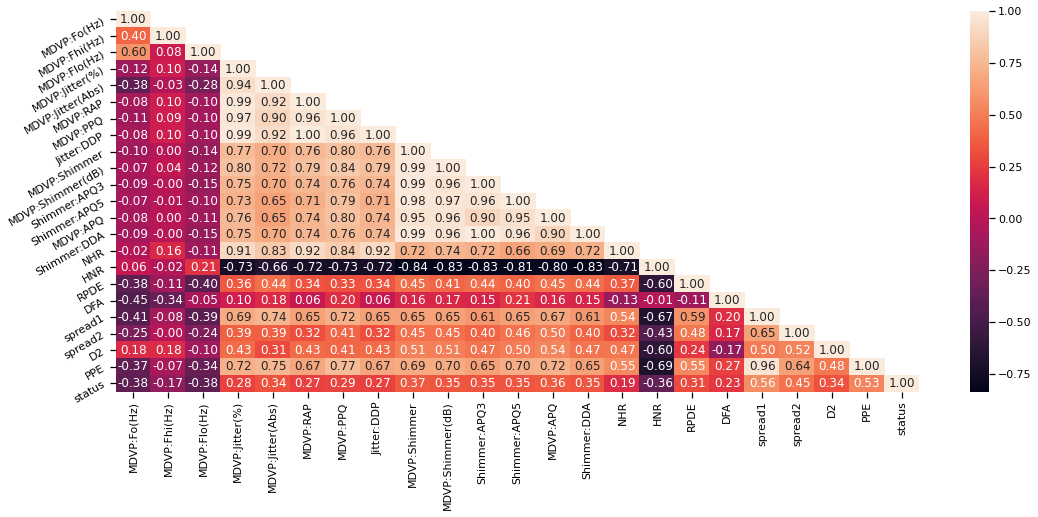

In [17]:
# Let's visualize the pairwise coorelation, for ease of understanding paiwise correlations.

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [37]:
# I will summarize observations in below sections

In [18]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.8) & (sort < 1)]

Shimmer:DDA       Shimmer:APQ3      1.000000
Shimmer:APQ3      Shimmer:DDA       1.000000
Jitter:DDP        MDVP:RAP          1.000000
MDVP:RAP          Jitter:DDP        1.000000
Jitter:DDP        MDVP:Jitter(%)    0.990276
                                      ...   
MDVP:Shimmer(dB)  MDVP:Jitter(%)    0.804289
MDVP:APQ          MDVP:PPQ          0.804139
MDVP:PPQ          MDVP:APQ          0.804139
MDVP:APQ          HNR               0.800407
HNR               MDVP:APQ          0.800407
Length: 80, dtype: float64

If any 2 independent variables have a correlation of above 0.99, I will drop 1 of them as I will assume that the other one provides the same information and the rest is noise

### Observations 
Based on Pair plot & Correlation map we can infer the association between the attributes and target column:

<b>Vocal fundamental frequency </b>
- There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. 
- The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. 
- The high vocal frequency does not have any skewness, but some range of values are at the right most tail


<b>Tonal component of frequency</b> 
- The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. 
- The maximum number of observations is between 0 and 0.04. 
- The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

<b> Variation in amplitude</b>
-  positively skewed

<b> Influence of important features on status </b>
- Jitters & Shimmers seem to have strong influence
- Can use catplot to further investgate relationship with features

</br><b>Correlation</b>
- MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
- MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
- The target variable status has a weak positive corelation with spread1
- Based on filter condition in Corr, I will use all features for prediction

<br><b>Others</b>
- <b>1. name</b> is row unique identifier, will drop it
- <b>2. status </b> has two values 0 and 1 
- <b>3. Others </b> Please refer to notes written in earlier section of this notebook
- <b>4. Normalizing </b> The ML models will benefit from normalizing the features
- <b>5. Outliers </b> based on plots above, clearly few attributors have ouliers. This will impact algorithms like Logistic Regression and Support Vector Machine. This will not affect robust models like K-Nearest Neighbors
- <b>6. Missing values </b> None

# ------------------------- Model Building ---------------------------------

##### Dimensionality Reduction
- drop "name" column, based on EDA done above in this notebook.

In [19]:
df.head(1)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007    0.0037   0.00554     0.01109       0.04374   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182        0.0313   0.02971      0.06545   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   

        PPE  status  
0  0.284654       1

Dropping highly correlated independent variables

In [20]:
# drop name
df = df.drop(['name'], axis=1)

# List Columns
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [21]:
df.head(1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0    0.0037   0.00554     0.01109       0.04374             0.426   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182        0.0313   0.02971      0.06545  0.02211  21.033   

       RPDE       DFA   spread1   spread2        D2       PPE  status  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654       1

In [22]:
df.shape

(195, 23)

In [23]:
# As commented in earlier steps, I will drop one variable from the pair having correlation higher than set threshold

# For the purpose of this project, I am setting threshold 0.99

for col in df.drop("status", axis=1).columns:
    try:
        for column in df.drop([col, "status"], axis=1).columns:
            try:
                if df[col].corr(df[column]) > 0.99:
                    df.drop(column, axis=1, inplace=True)
            except:
                pass
    except:
        pass

In [24]:
df.head(1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:PPQ  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0   0.00554       0.04374             0.426       0.02182        0.0313   

   MDVP:APQ      NHR     HNR      RPDE       DFA   spread1   spread2  \
0   0.02971  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   

         D2       PPE  status  
0  2.301442  0.284654       1

In [25]:
df.shape

(195, 20)

We now have only 19 independent features, and 1 target variable

#### Seperate, Scale & Prepare

I will scale the features as standard practice to help address any potential bias.

In [26]:
# Separate target and independent variables
X = df.drop('status', axis=1)
y = df['status']

# Scaling X
X = X.apply(zscore)

### Spliting the data into training and test set in the ratio of 70:30

In [27]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### Standard algorithms & accuracy on test data

#### <span style="color:green">Training & Testing models</span>

 <span style="color:red"><b>run_model</b> function</span>
  - I have written this custom function to build, train, test models and generate performance report
  - I am using custom function since this project involves testing many models, and it's easier this way
  
<span style="color:green">Below steps will build, train & test various models</span>
 - I will display performance metrics for each model
 - Howevet, will detailed comparison and observations after running all


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.684
Accuracy for testing set: 0.763



              precision    recall  f1-score   support

           0       0.52      0.73      0.61        15
           1       0.89      0.77      0.83        44

    accuracy                           0.76        59
   macro avg       0.71      0.75      0.72        59
weighted avg       0.80      0.76      0.77        59



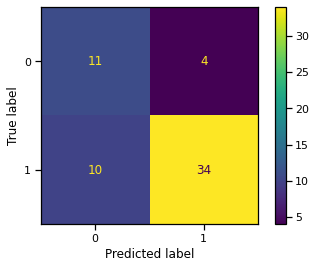

In [28]:
# Naive Bayes Model
nb = GaussianNB()

summary_df = run_model(summary_df, nb, "Naive Bayes", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.868
Accuracy for testing set: 0.864



              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



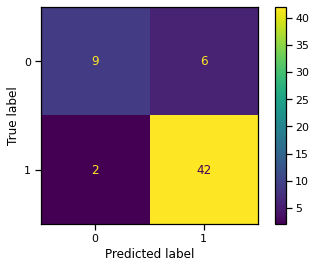

In [29]:
# Applying Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=5)

summary_df = run_model(summary_df, logreg, "Logistic Regression", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.949
Accuracy for testing set: 0.898



              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



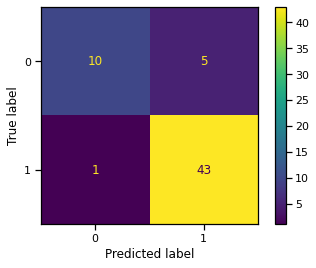

In [30]:
# Applying KNN
knn = KNeighborsClassifier(n_neighbors=5)

summary_df = run_model(summary_df, knn, "K-Nearest Neighbors", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.890
Accuracy for testing set: 0.915



              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



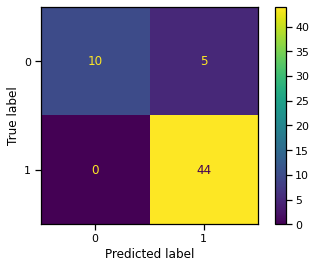

In [31]:
# Applying SVM
svmc = SVC(C=3, gamma=0.025, random_state=5)

summary_df = run_model(summary_df, svmc, "Support Vector Machine", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.949
Accuracy for testing set: 0.831



              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.89      0.89      0.89        44

    accuracy                           0.83        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.83      0.83      0.83        59



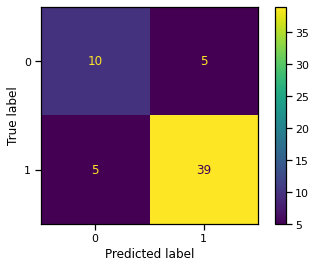

In [32]:
# Applying decision tree algorithm
dtree = DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.001, min_samples_leaf=5, random_state=5)

summary_df = run_model(summary_df, dtree, "Decision Tree", X_train , X_test , y_train , y_test)

### Train a Meta-classifier - Stacking & Random Forest


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.934
Accuracy for testing set: 0.932



              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



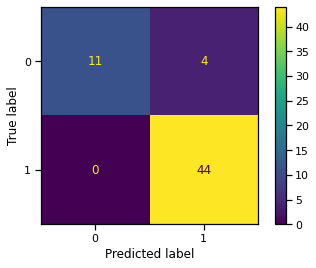

In [33]:
# # Initialize base models

# List of these models
base_models = [("knn",knn) , ("Logistic Regression",logreg) , ("Naive Bayes",nb) , ("SVM",svmc)]

# final_est = LogisticRegression()
final_est = RandomForestClassifier(criterion = 'gini', min_impurity_decrease=0.001, min_samples_leaf=10, random_state=5)

# Creating meta model
meta = StackingClassifier(estimators=base_models, final_estimator=final_est, cv=5)

summary_df = run_model(summary_df, meta, "Meta-Model / Stacking", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 0.956
Accuracy for testing set: 0.898



              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



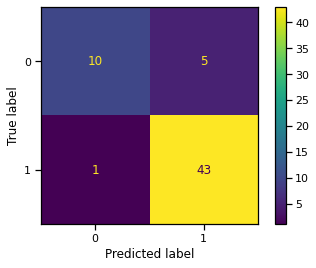

In [34]:
# Bootstrap Agg

bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=50, max_samples=.7, random_state=5)

summary_df = run_model(summary_df, bgcl, "Bootstrap Aggregating", X_train , X_test , y_train , y_test)


********** PERFORMANCE METRICS**********

---------------------------------------------------


Accuracy for training set: 1.000
Accuracy for testing set: 0.847



              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.89      0.91      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.84      0.85      0.85        59



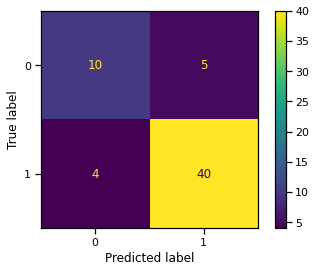

In [35]:
# Adaptive Boosting
abcl = AdaBoostClassifier(n_estimators= 50, random_state=5)

summary_df = run_model(summary_df, abcl, "Adaptive Boosting", X_train , X_test , y_train , y_test)

## Performance Comparison

#### <span style="color:red">The number of models are selected as per instructions in project file </span>

#### <span style="color:green">Performance detail of all models is displayed in below table </span>


In [36]:
summary_df.sort_values(by="Out-of-sample Accuracy", ascending=False)

Model Name  In-sample Accuracy  Out-of-sample Accuracy  Recall  \
5   Meta-Model / Stacking               0.934                   0.932   1.000   
3  Support Vector Machine               0.890                   0.915   1.000   
2     K-Nearest Neighbors               0.949                   0.898   0.977   
6   Bootstrap Aggregating               0.956                   0.898   0.977   
1     Logistic Regression               0.868                   0.864   0.955   
7       Adaptive Boosting               1.000                   0.847   0.909   
4           Decision Tree               0.949                   0.831   0.886   
0             Naive Bayes               0.684                   0.763   0.773   

   F1 Score  Precision  
5     0.957      0.917  
3     0.946      0.898  
2     0.935      0.896  
6     0.935      0.896  
1     0.913      0.875  
7     0.899      0.889  
4     0.886      0.886  
0     0.829      0.895

# Final Conclusion

#### Best Model - Meta Classifier (Stacking)

- Training Data Accuracy Score 93.4%
- Testing Data Accuracy Score 93.2%   
- Recall 100%
- F1 Score 95.7%
- Precision 91.7%
- Base Algorithms: KNN, Logistic Regression, Naive Bayes, SVM
- Final Estimator: Random Forest

Based on performance summary table listed above, the Meta-model / Stacking has performed the best across all performance metrics. Additioanlly, the performance is well balanced with training and test data. 


## ---------------------------------------END----------------------------------------------